### Baseline

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
%%time
data_train = pd.read_csv('./data/my_train.csv')
data_test = pd.read_csv('./data/my_test.csv')

CPU times: user 1min 15s, sys: 19.8 s, total: 1min 35s
Wall time: 1min 55s


In [3]:
data_train.head()

,Unnamed: 0,id,vas_id,buy_time_x,target,0,1,2,3,4,...,243,244,245,246,247,248,249,250,251,252
0,0,540968,8.0,1537131600,0.0,-31.559971,327.360888,-45.500786,274.753202,-50.918246,...,-845.373846,-613.770792,-20.996269,-37.630448,-28.747724,4.167111,7.305572,-12.175933,21.54386,0.0
1,1,1454121,4.0,1531688400,0.0,547.270029,238.430888,533.329214,274.803202,527.911754,...,-972.373846,-613.770792,-25.996269,-19.630448,-278.747724,-24.832889,-0.694428,-11.175933,-0.45614,0.0
2,2,2458816,1.0,1534107600,0.0,-92.139971,-95.469112,-106.080786,-139.596798,-111.498246,...,-977.373846,-613.770792,-25.996269,-37.630448,-304.747724,-25.832889,-0.694428,-12.175933,-0.45614,0.0
3,3,3535012,5.0,1535922000,0.0,54.880029,12.970888,54.079214,-9.116798,48.661754,...,-977.373846,-613.770792,-25.996269,-18.630448,-133.747724,-14.832889,-0.694428,-1.175933,-0.45614,0.0
4,4,1693214,1.0,1535922000,0.0,45.160029,295.240888,64.679214,344.283202,59.261754,...,-965.373846,-612.770792,-22.996269,-32.630448,-127.747724,-4.832889,-0.694428,-12.175933,-0.45614,0.0


In [4]:
data_test.head()

,Unnamed: 0,id,vas_id,buy_time_x,0,1,2,3,4,5,...,243,244,245,246,247,248,249,250,251,252
0,0,3130519,2.0,1548018000,-62.899971,-374.279112,-72.600786,-418.406798,-78.018246,-439.51179,...,-970.373846,-613.770792,-25.996269,-37.630448,-258.747724,-25.832889,-0.694428,-12.175933,-0.45614,0.0
1,1,2000860,4.0,1548018000,-96.799971,100.290888,-110.740786,140.903202,-116.158246,119.79821,...,-977.373846,-613.770792,-25.996269,-37.630448,-254.747724,-25.832889,-0.694428,-12.175933,-0.45614,0.0
2,2,1099444,2.0,1546808400,-81.969971,-390.729112,-95.910786,-443.336798,-101.328246,-464.44179,...,-977.373846,-613.770792,-25.996269,-37.630448,-306.747724,-25.832889,-0.694428,-12.175933,-0.45614,1.0
3,3,1343255,5.0,1547413200,259.130029,-52.249112,245.189214,-104.856798,239.771754,-125.96179,...,-977.373846,-613.770792,-25.996269,-37.630448,-306.747724,-25.832889,-0.694428,-12.175933,-0.45614,1.0
4,4,1277040,2.0,1546808400,331.170029,590.890888,317.229214,538.283202,311.811754,522.25821,...,-651.373846,-612.770792,1.003731,-36.630448,38.252276,-12.832889,-0.694428,-12.175933,12.54386,0.0


In [5]:
data_train_target = data_train.target

In [6]:
data_train.drop(['Unnamed: 0', 'target'], axis=1, inplace=True)
data_test.drop(['Unnamed: 0'], axis=1, inplace=True)

In [7]:
data_train['vas_id'] = data_train['vas_id'].astype('int')
data_test['vas_id'] = data_test['vas_id'].astype('int')

#### Train и Valid

<AxesSubplot:>

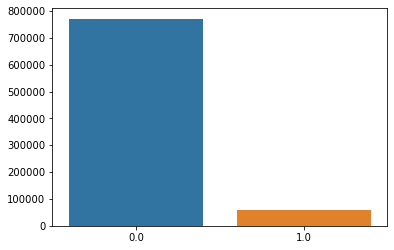

In [8]:
dis = data_train_target.value_counts()
sns.barplot(x=dis.index, y=dis.values)

In [9]:
from sklearn.model_selection import train_test_split

train_idx, valid_idx = train_test_split(data_train.index, test_size=0.3, random_state=42)

y_train, y_valid = data_train_target.loc[train_idx], data_train_target.loc[valid_idx]
X_train, X_valid = data_train.loc[train_idx], data_train.loc[valid_idx]

print("Train")
print(data_train_target.loc[train_idx].value_counts()/train_idx.shape[0])
print()
print("Test")
print(data_train_target.loc[valid_idx].value_counts()/valid_idx.shape[0])

Train
0.0    0.927666
1.0    0.072334
Name: target, dtype: float64

Test
0.0    0.92755
1.0    0.07245
Name: target, dtype: float64


#### Логистическая регрессия

In [10]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(random_state=42, n_jobs=3)

In [11]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_validate

kfold_cv = KFold(n_splits=3, shuffle=True, random_state=42)

In [12]:
def run_cv(estimator, cv, X, y, scoring='roc_auc', model_name=""):
    cv_res = cross_validate(estimator, X, y, cv=cv, scoring=scoring, n_jobs=3)
    
    print("%s: %s = %0.2f (+/- %0.2f)" % (model_name,
                                         scoring,
                                         cv_res['test_score'].mean(),
                                         cv_res['test_score'].std() * 2))

In [13]:
run_cv(log_reg, kfold_cv, X_train, y_train, model_name="Baseline")

Baseline: roc_auc = 0.56 (+/- 0.00)


#### Валидация

In [14]:
%%time
log_reg.fit(X_train, y_train)

CPU times: user 768 ms, sys: 596 ms, total: 1.36 s
Wall time: 3min 4s


LogisticRegression(n_jobs=3, random_state=42)

In [15]:
log_reg_pred = log_reg.predict_proba(X_valid)[:,1]

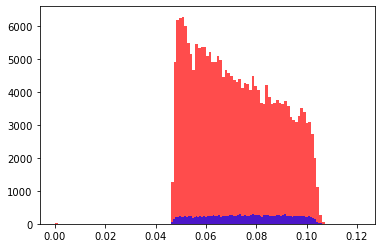

In [16]:
plt.hist(log_reg_pred[~y_valid.astype(bool)], bins=100, color='r', alpha=0.7);
plt.hist(log_reg_pred[y_valid.astype(bool)], bins=100, color='b', alpha=0.7);

In [17]:
from sklearn.metrics import precision_recall_curve, roc_curve, auc

fpr, tpr, roc_thresholds = roc_curve(y_valid, log_reg_pred)
precision, recall, pr_thresholds = precision_recall_curve(y_valid, log_reg_pred)

In [18]:
beta = 1 
fscore = (1+beta**2)*(precision * recall) / (beta**2*precision + recall)
ix = np.argmax(fscore)
print('Best Threshold=%f, F-Score=%.3f, Precision=%.3f, Recall=%.3f' % (pr_thresholds[ix], 
                                                                        fscore[ix],
                                                                        precision[ix],
                                                                        recall[ix]))

Best Threshold=0.072329, F-Score=0.151, Precision=0.087, Recall=0.572


In [19]:
def plot_roc_curve(fpr, tpr, model_name="", color=None):
    plt.plot(fpr, tpr, label='%s: ROC curve (area = %0.2f)' %
             (model_name, auc(fpr, tpr)), color=color)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0.0, 1.0, 0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('%s: Receiver operating characteristic curve' % model_name)
    plt.legend(loc="lower right")

Baseline: AUC_ROC = 0.565


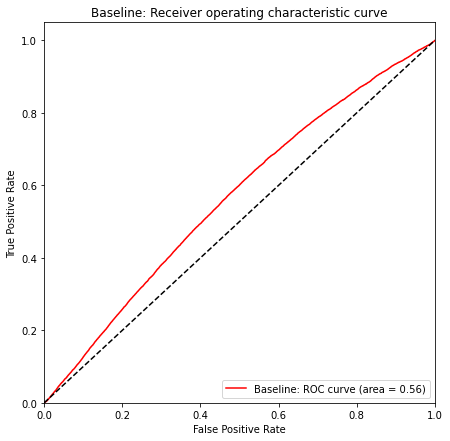

In [20]:
plt.figure(figsize=(7, 7))
plot_roc_curve(fpr, tpr, "Baseline", color='r')
print("Baseline: AUC_ROC = %.3f" % auc(fpr, tpr))

In [128]:
def plot_precision_recall_curve(recall, precision, model_name="", color=None, max_y=0.2):
    plt.plot(recall, precision, label='%s: Precision-Recall curve (area = %0.2f)' %
             (model_name, auc(recall, precision)), color=color)
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title("%s: Precision-Recall curve" % model_name)
    plt.axis([0.0, 1.0, 0.0, max_y])
    plt.legend(loc="lower left")

Baseline: AUC_PR = 0.085


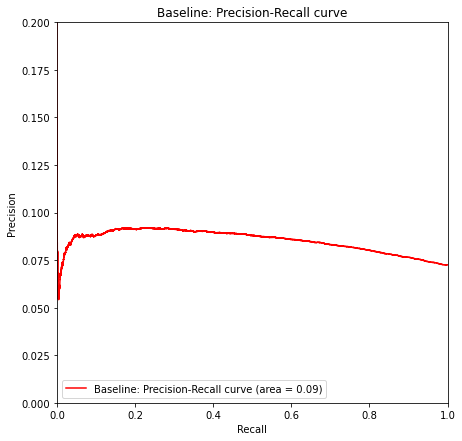

In [22]:
plt.figure(figsize=(7, 7))
    
plot_precision_recall_curve(recall, precision, "Baseline", color='r')
print("Baseline: AUC_PR = %.3f" % auc(recall, precision))

In [23]:
import itertools
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(cm, classes,
                          model_name="",
                          normalize=False,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest',  cmap=cmap)
    
    plt.grid(False)
    plt.title('%s: confusion matrix' % model_name)
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.tight_layout()

Confusion matrix, without normalization
[[122588 108832]
 [  7740  10336]]


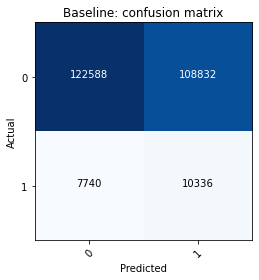

In [24]:
cm = confusion_matrix(y_valid, log_reg_pred > pr_thresholds[ix])
plot_confusion_matrix(cm, classes=["0", "1"], model_name="Baseline");

In [25]:
from sklearn.metrics import classification_report

print(classification_report(y_valid, log_reg_pred > pr_thresholds[ix]))

              precision    recall  f1-score   support

         0.0       0.94      0.53      0.68    231420
         1.0       0.09      0.57      0.15     18076

    accuracy                           0.53    249496
   macro avg       0.51      0.55      0.41    249496
weighted avg       0.88      0.53      0.64    249496



### Признаки

In [26]:
data_train_unique = data_train.nunique()
data_train_unique

id            806613
vas_id             8
buy_time_x        26
0              46162
1             112909
               ...  
248             2342
249              265
250             1599
251              248
252               30
Length: 256, dtype: int64

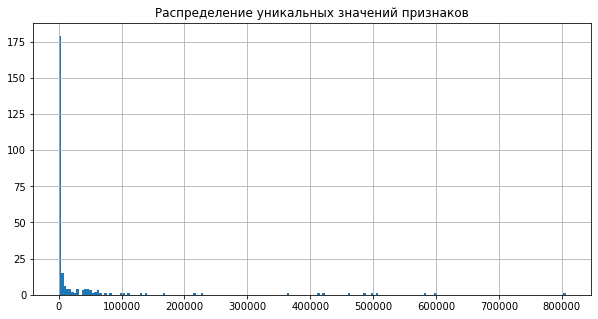

In [27]:
plt.title("Распределение уникальных значений признаков");
data_train_unique.hist(bins=200, figsize=(10, 5));

#### Константы

In [75]:
feat_const = set(data_train_unique[data_train_unique == 1].index.tolist())
len(feat_const)

5

#### Вещественные 

In [76]:
feat_float = (data_train.fillna(0).astype(int).sum() - data_train.fillna(0).sum()).abs()
feat_float = set(feat_float[feat_float > 0].index.tolist())
len(feat_float)

247

In [77]:
feat_oth = set(data_train_unique.index.tolist()) - (feat_float | feat_const)
len(feat_oth)

4

#### Целочисленные 

In [78]:
feat_int = (data_train.loc[:, feat_oth].astype(int).sum() - data_train.loc[:, feat_oth].sum()).abs()
feat_int = set(feat_int[feat_int == 0].index.tolist())
len(feat_int)

4

In [79]:
data_train['vas_id'].value_counts()

1    310175
2    249505
5     94085
4     85756
6     57878
7     15432
8     13350
9      5472
Name: vas_id, dtype: int64

#### Категориальные

In [80]:
feat_categorical = set(data_train_unique.loc[feat_oth][data_train_unique.loc[feat_oth] <= 10].index.tolist())
feat_categorical

{'vas_id'}

In [81]:
feat_oth = feat_oth - feat_categorical
len(feat_oth)

3

In [82]:
feat_float = feat_float | feat_oth

In [83]:
feat_oth = feat_oth - feat_float
len(feat_oth)

0

In [85]:
print('f_all:', data_train_unique.shape)
print('---------------')
print('feat_const:', len(feat_const))
print('feat_categorical:', len(feat_categorical))
print('feat_float:', len(feat_float))

f_all: (256,)
---------------
feat_const: 5
feat_categorical: 1
feat_float: 250


In [86]:
feat_ok = list(feat_categorical | feat_float)
feat_categorical, feat_float = list(feat_categorical), list(feat_float)

In [87]:
len(feat_ok)

251

### Pipelines

In [88]:
from sklearn.base import BaseEstimator, TransformerMixin

In [89]:
class ColumnSelector(BaseEstimator, TransformerMixin):
    def __init__(self, columns):
        self.columns = columns

    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        assert isinstance(X, pd.DataFrame)

        try:
            return X[self.columns]
        except KeyError:
            cols_error = list(set(self.columns) - set(X.columns))
            raise KeyError("DataFrame не содердит следующие колонки: %s" % cols_error)

In [90]:
from sklearn.pipeline import FeatureUnion, make_pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder

In [91]:
feat_prep_pipeline = make_pipeline(
    ColumnSelector(columns=feat_ok),
    FeatureUnion(transformer_list=[
        ("float_features", make_pipeline(
            ColumnSelector(feat_float),
            StandardScaler()
        )),
        ("categorical_features", make_pipeline(
            ColumnSelector(feat_categorical),
            OneHotEncoder(handle_unknown='ignore')
        ))
    ])
)

In [93]:
%%time
feat_prep_pipeline.fit(X_train)

n_features = feat_prep_pipeline.transform(X_valid).shape[1]
n_features

CPU times: user 6.91 s, sys: 904 ms, total: 7.82 s
Wall time: 7.81 s


258

#### GreedSearch

In [95]:
kfold_cv = KFold(n_splits=3, shuffle=True, random_state=42)

In [96]:
lg_pipe = make_pipeline(
    feat_prep_pipeline,
    LogisticRegression(random_state=42)
)

In [97]:
from sklearn.model_selection import GridSearchCV
def run_grid_search(estimator, X, y, params_grid, cv, scoring='roc_auc'):
    gsc = GridSearchCV(estimator, params_grid, scoring=scoring, cv=cv, n_jobs=-1)

    gsc.fit(X, y)
    print("Best %s score: %.2f" % (scoring, gsc.best_score_))
    print()
    print("Best parameters set found on development set:")
    print()
    print(gsc.best_params_)
    print()
    print("Grid scores on development set:")
    print()

    for i, params in enumerate(gsc.cv_results_['params']):
        print("%0.3f (+/-%0.03f) for %r"
              % (gsc.cv_results_['mean_test_score'][i], gsc.cv_results_['std_test_score'][i] * 2, params))

    print()
    
    return gsc

In [98]:
%%time
param_grid = {
    "logisticregression__penalty": ['l2'],
    "logisticregression__C": [0.01, 0.1]
}

lg_gsc = run_grid_search(lg_pipe, X_train, y_train, param_grid, kfold_cv)

/home/alex/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Best roc_auc score: 0.87

Best parameters set found on development set:

{'logisticregression__C': 0.1, 'logisticregression__penalty': 'l2'}

Grid scores on development set:

0.869 (+/-0.005) for {'logisticregression__C': 0.01, 'logisticregression__penalty': 'l2'}
0.870 (+/-0.005) for {'logisticregression__C': 0.1, 'logisticregression__penalty': 'l2'}

CPU times: user 58.2 s, sys: 4.72 s, total: 1min 2s
Wall time: 9min 35s


In [99]:
lg_pipe = make_pipeline(
    feat_prep_pipeline,
    LogisticRegression(random_state=42, C = 0.1, n_jobs=-1)
)

In [100]:
%%time
lg_pipe.fit(X_train, y_train)

CPU times: user 14.2 s, sys: 1.97 s, total: 16.2 s
Wall time: 1min 3s


Pipeline(steps=[('pipeline',
                 Pipeline(steps=[('columnselector',
                                  ColumnSelector(columns=['199', '211', '57',
                                                          '103', '186', '135',
                                                          '54', '79', '146',
                                                          '226', '250', '14',
                                                          '115', '45', '221',
                                                          '52', '92', '193',
                                                          '100', '55', '67',
                                                          '98', '178', '182',
                                                          '26', '159', '237',
                                                          '113', '42', '249', ...])),
                                 ('featureunion',
                                  FeatureUnion(transformer_list=[('float_features',

In [132]:
log_reg_pipeline_pred = lg_pipe.predict_proba(X_valid)[:,1]

In [133]:
from sklearn.metrics import precision_recall_curve, roc_curve, auc

fpr, tpr, roc_thresholds = roc_curve(y_valid, log_reg_pipeline_pred)
precision, recall, pr_thresholds = precision_recall_curve(y_valid, log_reg_pipeline_pred)

In [134]:
beta = 1 
fscore = (1+beta**2)*(precision * recall) / (beta**2*precision + recall)
ix = np.nanargmax(fscore)
print('Best Threshold=%f, F-Score=%.3f, Precision=%.3f, Recall=%.3f' % (pr_thresholds[ix], 
                                                                        fscore[ix],
                                                                        precision[ix],
                                                                        recall[ix]))

Best Threshold=0.247989, F-Score=0.488, Precision=0.397, Recall=0.632


<ipython-input-134-5acbc19d51a9>:2: RuntimeWarning: invalid value encountered in true_divide
  fscore = (1+beta**2)*(precision * recall) / (beta**2*precision + recall)


Confusion matrix, without normalization
[[214050  17370]
 [  6644  11432]]


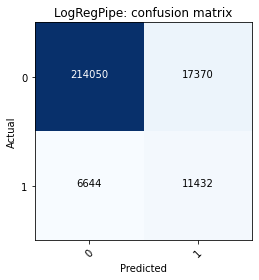

In [135]:
cm = confusion_matrix(y_valid, log_reg_pipeline_pred > pr_thresholds[ix])
plot_confusion_matrix(cm, classes=["0", "1"], model_name="LogRegPipe");

LogReg+Pipe: AUC_ROC = 0.872


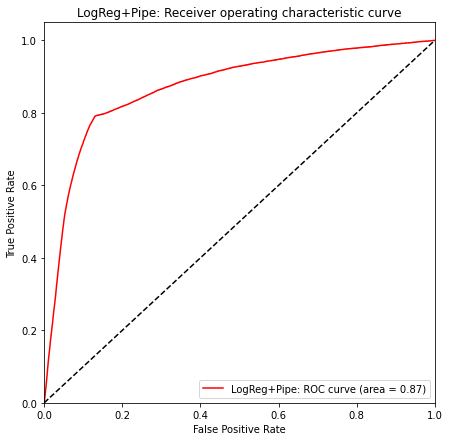

In [136]:
plt.figure(figsize=(7, 7))
plot_roc_curve(fpr, tpr, "LogReg+Pipe", color='r')
print("LogReg+Pipe: AUC_ROC = %.3f" % auc(fpr, tpr))

LogReg+Pipe: AUC_PR = 0.369


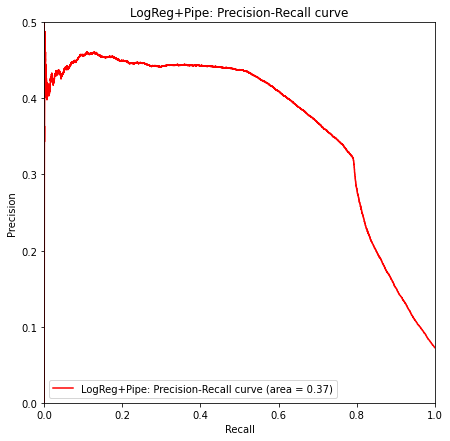

In [137]:
plt.figure(figsize=(7, 7))
    
plot_precision_recall_curve(recall, precision, "LogReg+Pipe", color='r', max_y=0.5)
print("LogReg+Pipe: AUC_PR = %.3f" % auc(recall, precision))

In [138]:
from sklearn.metrics import classification_report

print(classification_report(y_valid, log_reg_pipeline_pred > pr_thresholds[ix]))

              precision    recall  f1-score   support

         0.0       0.97      0.92      0.95    231420
         1.0       0.40      0.63      0.49     18076

    accuracy                           0.90    249496
   macro avg       0.68      0.78      0.72    249496
weighted avg       0.93      0.90      0.91    249496



### CatBoost

In [142]:
import catboost

In [143]:
kfold_cv = KFold(n_splits=3, shuffle=True, random_state=42)

In [144]:
model_catb = catboost.CatBoostClassifier(cat_features=['id', 'vas_id'],
                                      silent=True, random_state=42)

In [146]:
param_grid = {
    "depth": [3],
    "iterations": [300],
    'l2_leaf_reg': [5, 15, 25]
}

In [148]:
%%time
catb_gsc = run_grid_search(model_catb, X_train, y_train, param_grid, kfold_cv)

Best roc_auc score: 0.94

Best parameters set found on development set:

{'depth': 3, 'iterations': 300, 'l2_leaf_reg': 5}

Grid scores on development set:

0.940 (+/-0.002) for {'depth': 3, 'iterations': 300, 'l2_leaf_reg': 5}
0.940 (+/-0.001) for {'depth': 3, 'iterations': 300, 'l2_leaf_reg': 15}
0.940 (+/-0.002) for {'depth': 3, 'iterations': 300, 'l2_leaf_reg': 25}

CPU times: user 4min 16s, sys: 2.23 s, total: 4min 19s
Wall time: 10min 11s


In [149]:
model_catb = catboost.CatBoostClassifier(n_estimators=200, 
                                         max_depth=3, 
                                         l2_leaf_reg=5, 
                                         cat_features=['id', 'vas_id'], 
                                         silent=True, 
                                         random_state=42)

In [150]:
%%time
model_catb.fit(X_train, y_train)

CPU times: user 2min 56s, sys: 685 ms, total: 2min 57s
Wall time: 48.5 s


In [151]:
%%time
catb_pred = model_catb.predict_proba(X_valid)[:,1]

CPU times: user 712 ms, sys: 10.9 ms, total: 723 ms
Wall time: 561 ms


In [152]:
fpr, tpr, roc_thresholds = roc_curve(y_valid, catb_pred)
precision, recall, pr_thresholds = precision_recall_curve(y_valid, catb_pred)

In [153]:
beta = 1 
fscore = (1+beta**2)*(precision * recall) / (beta**2*precision + recall)
ix = np.nanargmax(fscore)
print('Best Threshold=%f, F-Score=%.3f, Precision=%.3f, Recall=%.3f' % (pr_thresholds[ix], 
                                                                        fscore[ix],
                                                                        precision[ix],
                                                                        recall[ix]))

Best Threshold=0.257273, F-Score=0.599, Precision=0.532, Recall=0.685


CatBoost: AUC_ROC = 0.947


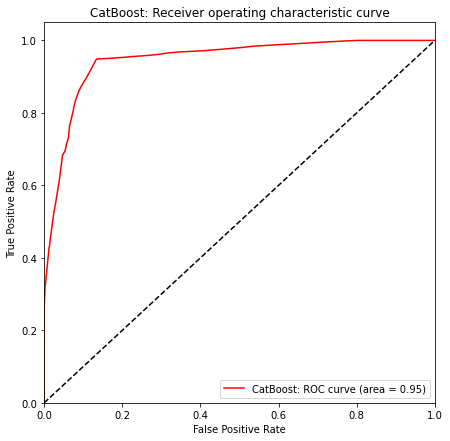

In [154]:
plt.figure(figsize=(7, 7))
plot_roc_curve(fpr, tpr, "CatBoost", color='r')
print("CatBoost: AUC_ROC = %.3f" % auc(fpr, tpr))

CatBoost: AUC_PR = 0.685


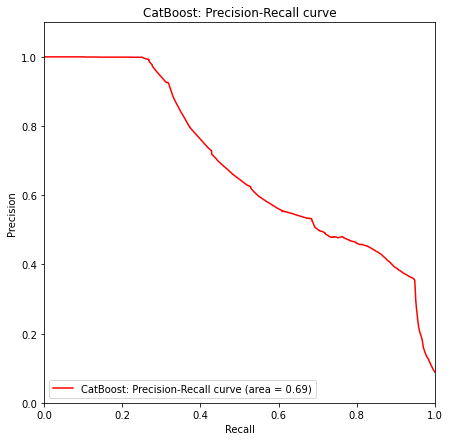

In [158]:
plt.figure(figsize=(7, 7))
    
plot_precision_recall_curve(recall, precision, "CatBoost", color='r', max_y=1.1)
print("CatBoost: AUC_PR = %.3f" % auc(recall, precision))

Confusion matrix, without normalization
[[220541  10879]
 [  5703  12373]]


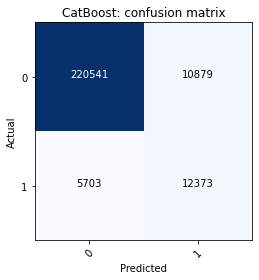

In [159]:
cm = confusion_matrix(y_valid, catb_pred > pr_thresholds[ix])
plot_confusion_matrix(cm, classes=["0", "1"], model_name="CatBoost");

In [160]:
print(classification_report(y_valid, catb_pred > pr_thresholds[ix]))

              precision    recall  f1-score   support

         0.0       0.97      0.95      0.96    231420
         1.0       0.53      0.68      0.60     18076

    accuracy                           0.93    249496
   macro avg       0.75      0.82      0.78    249496
weighted avg       0.94      0.93      0.94    249496



### Сравнение моделей

LogReg: AUC_PR = 0.369
LogReg: AUC_ROC = 0.872
LogReg+Pipe: AUC_PR = 0.369
LogReg+Pipe: AUC_ROC = 0.872
CatBoost: AUC_PR = 0.685
CatBoost: AUC_ROC = 0.947


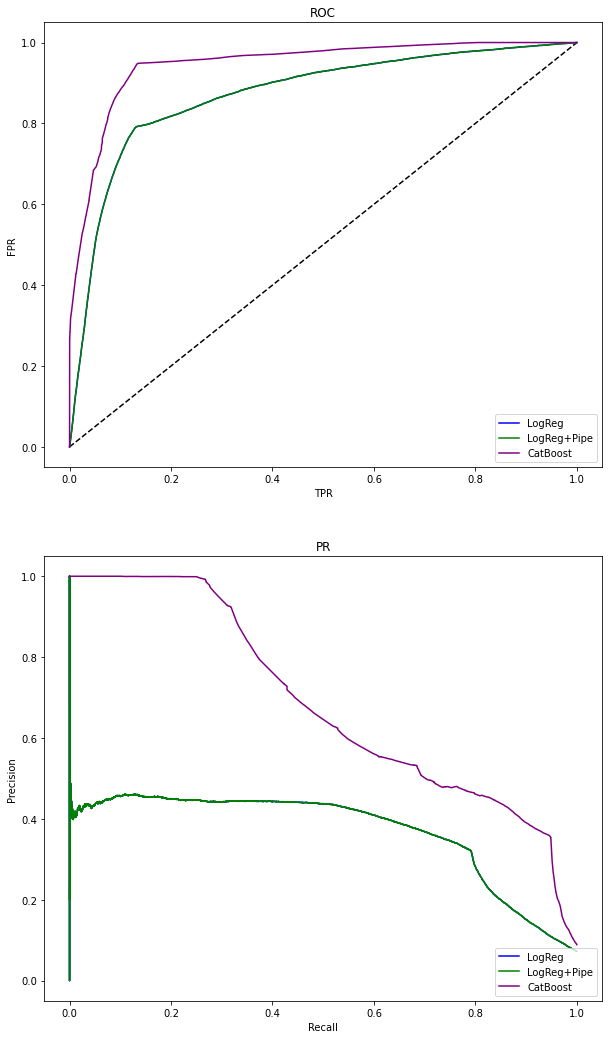

In [164]:
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)

f.set_figheight(18)
f.set_figwidth(10)

ax1 = plt.subplot(211)
ax1.set_title('ROC')
ax1.set_xlabel('TPR')
ax1.set_ylabel('FPR')


ax2 = plt.subplot(212)
ax2.set_title('PR')
ax2.set_xlabel('Recall')
ax2.set_ylabel('Precision')

ax1.plot([0, 1], [0, 1], 'k--')

fpr, tpr, roc_thresholds = roc_curve(y_valid, log_reg_pred)
precision, recall, pr_thresholds = precision_recall_curve(y_valid, log_reg_pred)
ax1.plot(fpr, tpr, label='LogReg', color='b')
ax2.plot(recall, precision, label='LogReg', color='b')
print("LogReg: AUC_PR = %.3f" % auc(recall, precision))
print("LogReg: AUC_ROC = %.3f" % auc(fpr, tpr))


fpr, tpr, roc_thresholds = roc_curve(y_valid, log_reg_pipeline_pred)
precision, recall, pr_thresholds = precision_recall_curve(y_valid, log_reg_pipeline_pred)
ax1.plot(fpr, tpr, label="LogReg+Pipe", color='g')
ax2.plot(recall, precision, label="LogReg+Pipe", color='g')
print("LogReg+Pipe: AUC_PR = %.3f" % auc(recall, precision))
print("LogReg+Pipe: AUC_ROC = %.3f" % auc(fpr, tpr))


fpr, tpr, roc_thresholds = roc_curve(y_valid, catb_pred)
precision, recall, pr_thresholds = precision_recall_curve(y_valid, catb_pred)
ax1.plot(fpr, tpr, label="CatBoost", color='purple')
ax2.plot(recall, precision, label="CatBoost", color='purple')
print("CatBoost: AUC_PR = %.3f" % auc(recall, precision))
print("CatBoost: AUC_ROC = %.3f" % auc(fpr, tpr))
ax1.legend(loc="lower right")
ax2.legend(loc="lower right");

### Лучшая модель - CatBoost, обучим ее на полной выборке train

In [208]:
model_catb = catboost.CatBoostClassifier(n_estimators=200, 
                                         max_depth=3, 
                                         l2_leaf_reg=5, 
                                         cat_features=['id', 'vas_id'], 
                                         silent=True, 
                                         random_state=42)

In [209]:
%%time
model_catb.fit(data_train, data_train_target)

CPU times: user 4min 23s, sys: 1.17 s, total: 4min 24s
Wall time: 1min 11s


In [210]:
result_proba = model_catb.predict_proba(data_test)

In [211]:
result = result_proba > pr_thresholds[ix]

In [212]:
answers_test = data_test[['id', 'vas_id', 'buy_time_x']]

In [213]:
target = pd.DataFrame(result[:, 1], columns = ['target'])

In [214]:
answers_test = pd.concat([answers_test, target], axis=1)

In [215]:
answers_test.rename(columns={'buy_time_x': 'buy_time'}, inplace=True)

In [216]:
answers_test['vas_id'] = answers_test['vas_id'].astype('float')

In [217]:
answers_test.head()

,id,vas_id,buy_time,target
0,3130519,2.0,1548018000,False
1,2000860,4.0,1548018000,False
2,1099444,2.0,1546808400,False
3,1343255,5.0,1547413200,False
4,1277040,2.0,1546808400,False


In [218]:
answers_test.to_csv('./result/answers_test.csv')

In [219]:
model_catb.save_model('./result/model.pcl')

In [220]:
from_file = catboost.CatBoostClassifier()

In [221]:
from_file.load_model('./result/model.pcl')

In [222]:
from_file_predict = from_file.predict_proba(data_test)

In [224]:
from_file_predict.sum() - result_proba.sum()

0.0